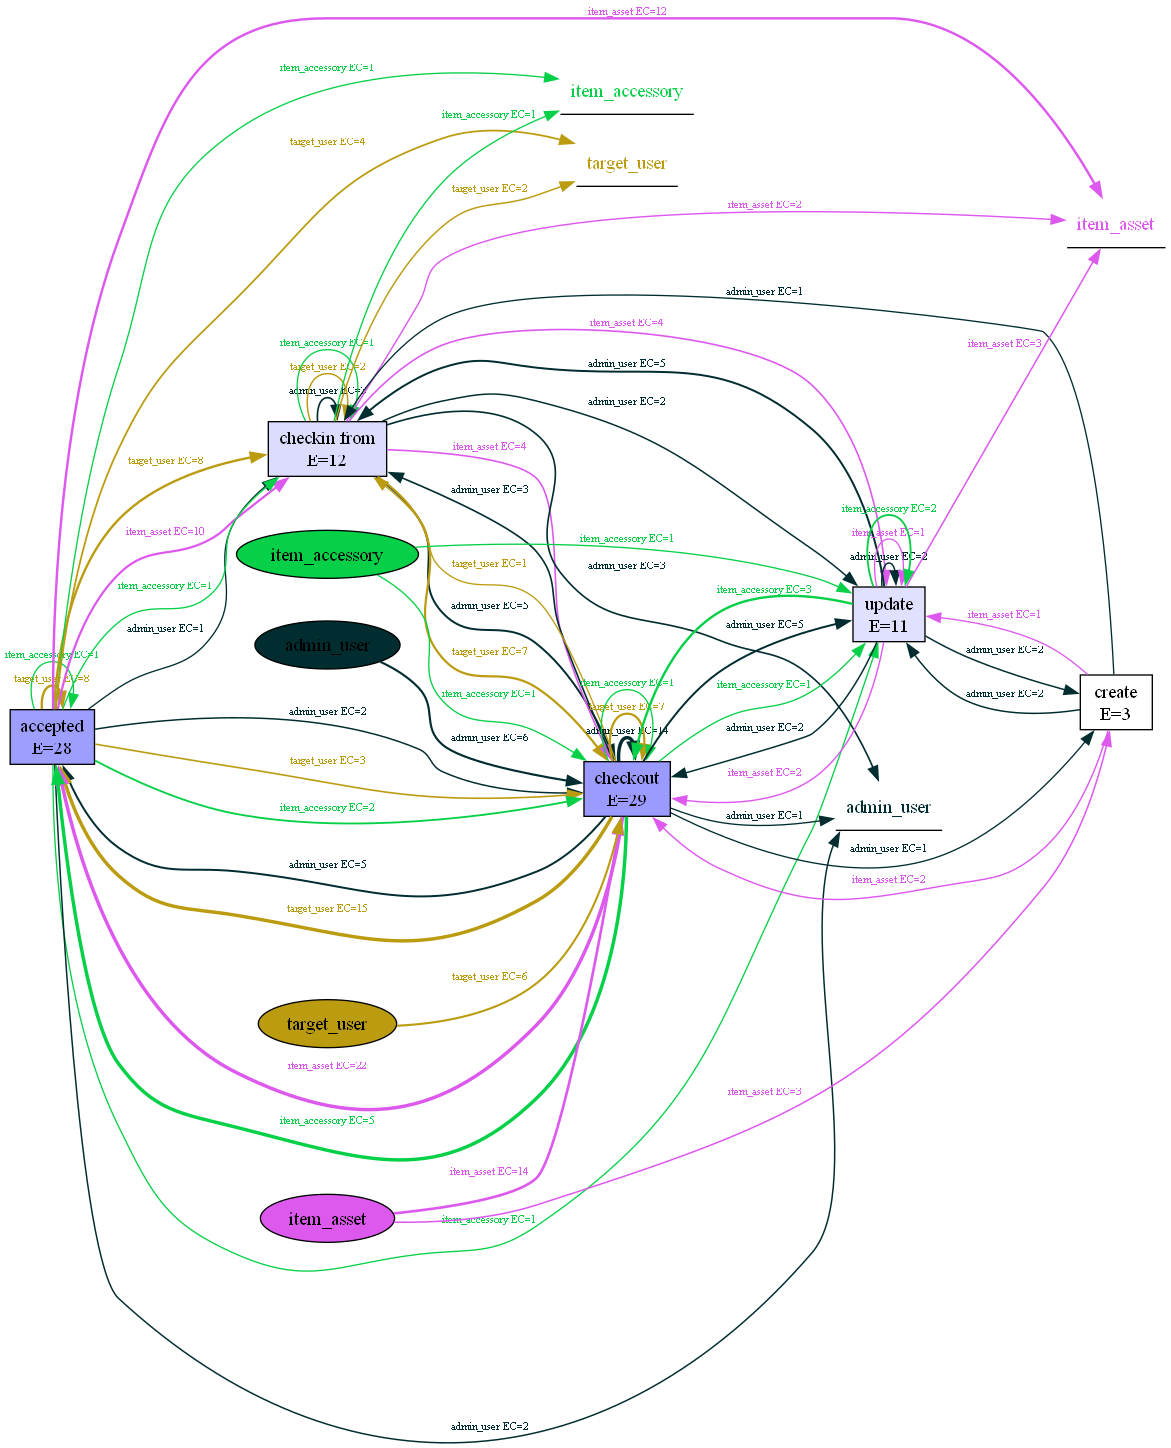

parsing log, completed traces ::   0%|          | 0/37 [00:00<?, ?it/s]

exporting log, completed traces ::   0%|          | 0/17 [00:00<?, ?it/s]

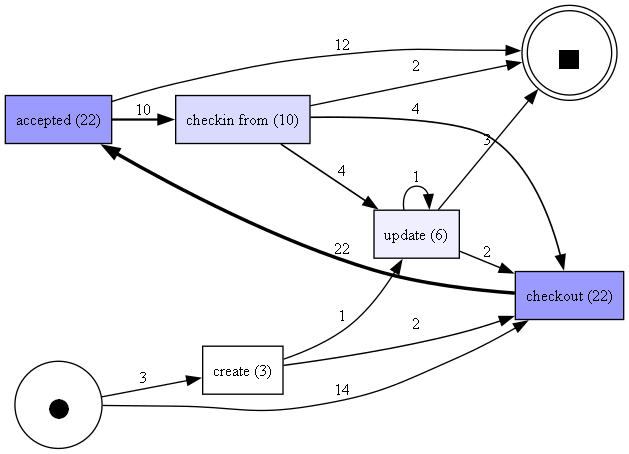

In [1]:
import pm4py
### filter itam_ocel
## focus only on ocel

### OCEL

# read ocel
itam_ocel = pm4py.read_ocel_json('../global/itam_ocel.jsonl')

# filter ocel regarding the time period (limited by min and max timestamp)
filtered_itam_ocel = pm4py.filtering.filter_ocel_events_timestamp(itam_ocel,min_timest='2024-03-25 08:48:23', max_timest='2024-03-25 12:02:12')
filtered_itam_ocel_path = '../dataProcessing/filtered_itam_ocel'

# write ocel with the predefined path above
pm4py.write_ocel_json(filtered_itam_ocel,filtered_itam_ocel_path)

vis = pm4py.discover_ocdfg(filtered_itam_ocel)
pm4py.vis.view_ocdfg(vis)

### XES

## Obsolete

itam_xes = pm4py.read_xes('../dataProcessing/itam_xes.xes')
filtered_itam_xes = pm4py.filtering.filter_time_range(itam_xes, dt1='2024-03-25 08:48:23', dt2='2024-03-25 12:02:12', mode = 'events', case_id_key='case:concept:name', timestamp_key='time:timestamp')
filtered_itam_xes_path = '../dataProcessing/filtered_itam_xes.xes'
pm4py.write_xes(filtered_itam_xes,filtered_itam_xes_path)

dfg, start_activities, end_activities = pm4py.discovery.discover_dfg(filtered_itam_xes,
                                                                     case_id_key='case:concept:name',
                                                                     activity_key='concept:name',
                                                                     timestamp_key='time:timestamp')
pm4py.vis.view_dfg(dfg, start_activities, end_activities)